<a href="https://colab.research.google.com/github/aanasingla/aana-the-techie/blob/main/TweetSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Package**

In [2]:
!pip install tweepy

**Add Credentials**

In [3]:
access_token = "501682241-ZG1DshytyxUIUY8FXPoH2AXaDG9d5DQlORemfAzU"
access_token_secret = "mxwCYkDjgWG5qWy8ONtVs3j2lxiYSxyberVVa92jmd27z"
consumer_key = "we0Drpnvc1FZNazKkiKoFWlGf"
consumer_secret = "OXRvmJwM6ca9k90XMIMoktSCa5XvjNieqJivcfjbOAlmpO6RhH"

In [7]:
import os
import tweepy as tw


In [8]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

*Look for tweets and build a dataframe*

In [9]:
import tweepy
import pandas as pd

#  Paste your Bearer Token here
bearer_token = "AAAAAAAAAAAAAAAAAAAAAHG22gEAAAAArwT1YFj0Vl7nGSqQdH1afHxXnhM%3DLTKH3InXSDfwpWLPgzcUBfDkcyw9wBWoUfIIZjSH7UD1D1tSJe"

# Set up the Twitter Client
client = tweepy.Client(bearer_token=bearer_token)

# Search recent tweets
query = "dengue -is:retweet lang:en"
response = client.search_recent_tweets(query=query, max_results=100)

# Save tweets in a DataFrame
tweets = response.data
if tweets:
    df = pd.DataFrame([tweet.text for tweet in tweets], columns=["Tweets"])
    display(df.head(10))
else:
    print("No tweets found.")

,Tweets
0,What a scam human lives are: \n\nThese Dengue ...
1,@sakuraaahaeru @azrulazimi_ @rehanahbhathal @D...
2,"@mybmc @mybmcWardN\n@ Ramabai Nagar, Ghatkopar..."
3,"@siciliadefender Just 2 tournaments lol,played..."
4,Hematological parameters in recent and past de...
5,"Dengue: 1 dead, 329 new cases reported in 24hr..."
6,@Niva_Bupa\nAlert all customer nivabupa not re...
7,Doesn't all this fit into @Udhaystalin agenda ...
8,@Hereprak Why u r worried u ppl didn’t bother ...
9,This looks invitation for dengue during this t...


In [10]:
df #not 'data'

,Tweets
0,What a scam human lives are: \n\nThese Dengue ...
1,@sakuraaahaeru @azrulazimi_ @rehanahbhathal @D...
2,"@mybmc @mybmcWardN\n@ Ramabai Nagar, Ghatkopar..."
3,"@siciliadefender Just 2 tournaments lol,played..."
4,Hematological parameters in recent and past de...
...,...
95,@aquaniantwin yes 🤍 the red cross and unhcr ar...
96,"Yeah, they said it’s Dengue fever and Diphther..."
97,▪️ Sprouts Highlights ▪️\n\nThe First Read of ...
98,@joeyigw Dengue is a bitch. We have it on out ...


Find more at [Tweet Extraction](https://github.com/RodolfoFerro/pandas_twitter/blob/master/01-extracting-data.md)

In [11]:
df.head(10)

,Tweets
0,What a scam human lives are: \n\nThese Dengue ...
1,@sakuraaahaeru @azrulazimi_ @rehanahbhathal @D...
2,"@mybmc @mybmcWardN\n@ Ramabai Nagar, Ghatkopar..."
3,"@siciliadefender Just 2 tournaments lol,played..."
4,Hematological parameters in recent and past de...
5,"Dengue: 1 dead, 329 new cases reported in 24hr..."
6,@Niva_Bupa\nAlert all customer nivabupa not re...
7,Doesn't all this fit into @Udhaystalin agenda ...
8,@Hereprak Why u r worried u ppl didn’t bother ...
9,This looks invitation for dengue during this t...


In [12]:
# Save tweets to a CSV file
df.to_csv("tweets.csv", index=False)

# Optional: download in Colab
from google.colab import files
files.download("tweets.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
text = " ".join(review for review in df["Tweets"])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 18772 words in the combination of all review.


In [15]:
# Create stopword list:
stopwords = set(STOPWORDS)

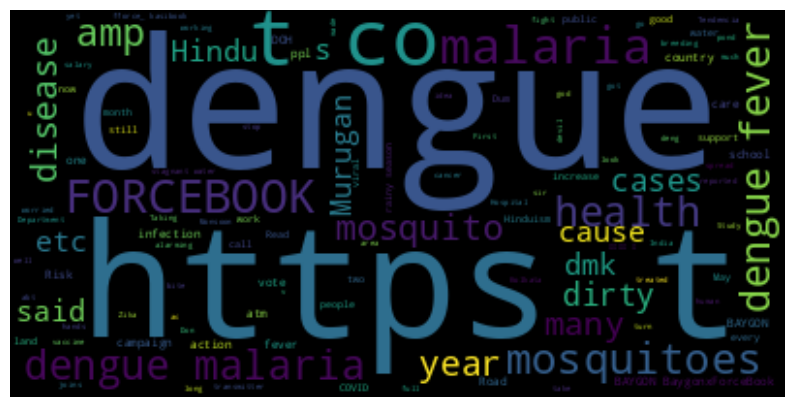

In [16]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
wordcloud

In [18]:
df["mytext_new"] = df['Tweets'].str.lower().str.replace('[^\w\s]','')


new_df = df.mytext_new.str.split(expand=True).stack().value_counts().reset_index()

new_df.columns = ['Word', 'Frequency']

new_df.head(10)

,Word,Frequency
0,the,75
1,dengue,65
2,of,64
3,and,60
4,is,51
5,in,45
6,to,42
7,a,31
8,for,31
9,this,20
